# SI 618 - Homework #2: More Data Manipulation

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

Version 2023.09.13.1.CT

# Background
You're a Data Science Consultant for an eCommerce retail company, they've asked you to analyze their sales database. Unfortunately, they did nothing to prepare or clean their data, only exporting their 3 database tables as JSON files. It's up to you to clean their data, analyze it and answer questions to help drive business value!

### The below files have been provided via the URLs shown:
- invoices.json https://github.com/umsi-data-science/data/raw/main/invoices.json
- items.json https://github.com/umsi-data-science/data/raw/main/items.json
- purchases.json https://github.com/umsi-data-science/data/raw/main/purchases.json

### They provided this data dictionary:

**InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction.  
**StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.  
**Description:** Product (item) name. Nominal.   
**Quantity:** The quantities of each product (item) per transaction. Numeric.  
**InvoiceDate:** Invoice Date and time. Numeric, the day and time when each transaction was generated.  
**UnitPrice:** Unit price. Numeric, Product price per unit in sterling.  
**CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.  
**Country:** Country name. Nominal, the name of the country where each customer resides.  

### A few notes from the company:
* If the InvoiceNo starts with the letter 'c', it indicates a cancellation. When conducting this analysis we only want to analyze invoices that were shipped. (ie. not canceled)
* The datasets should be able to be merged, each row in the invoice table corresponds to multiple rows in the purchases table.
* To find out the description or unit cost of an item in the purchase table, the StockCode should be used to match up the product in the items table. 
* They mentioned that they've been having a difficult time lately joining the items and purchases table, maybe there's something wrong with the columns?

# Answer the questions below.
- write your Python code that can answer the following questions 
- explain **ALL** your answers in plain English. 
- you can use as many code and markdown cells as you need for each question (i.e. don't limit yourself to just one of each if you feel you need more).

In [644]:
MY_UNIQNAME = 'yanlunar'  # replace this with your uniqname

### <span style="color:magenta"> Q1. [5 points] Describe the dataset. </span>
1. Load the data. 
1. How many total invoices have been placed?
1. How many unique customers are there?
1. What is the total number of unique items?
1. Are there any columns with null values?
1. Thinking ahead, how do you think you would join the different tables? Please share 2-3 sentences about your approach.

#### 1.1

In [645]:
import pandas as pd
import numpy as np

In [646]:
invoices = pd.read_json\
    ("https://github.com/umsi-data-science/data/raw/main/invoices.json")
items = pd.read_json\
    ("https://github.com/umsi-data-science/data/raw/main/items.json")
purchases = pd.read_json\
    ("https://github.com/umsi-data-science/data/raw/main/purchases.json")

In [647]:
invoices.sample(10)

,InvoiceNo,InvoiceDate,CustomerID,Country
17848,C567479,9/20/11 13:37,NaN,United Kingdom
23309,C576908,11/17/11 9:39,12670.0,France
4266,544091,2/16/11 8:37,14897.0,United Kingdom
7971,550320,4/17/11 12:37,12748.0,United Kingdom
15662,C563553,8/17/11 13:14,16755.0,United Kingdom
6185,547379,3/22/11 15:13,12720.0,Germany
16306,564724,8/28/11 12:16,15555.0,United Kingdom
1208,538470,12/12/10 12:34,15224.0,United Kingdom
374,536991,12/3/10 15:16,NaN,United Kingdom
9283,552565,5/10/11 11:55,15381.0,United Kingdom


In [648]:
invoices=invoices[~invoices['InvoiceNo'].str.startswith('C')]
invoices

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom
...,...,...,...,...
25938,581583,12/9/11 12:23,13777.0,United Kingdom
25939,581584,12/9/11 12:25,13777.0,United Kingdom
25940,581585,12/9/11 12:31,15804.0,United Kingdom
25941,581586,12/9/11 12:49,13113.0,United Kingdom


In [649]:
items.sample(10)

,StockCode,Description,UnitPrice
164,22962,JAM JAR WITH PINK LID,0.72
839,22419,LIPSTICK PEN RED,0.85
2249,84968D,SET OF 16 VINTAGE RED CUTLERY,12.75
500,22735,RIBBON REEL SOCKS AND MITTENS,1.65
2508,22229,BUNNY WOODEN PAINTED WITH FLOWER,0.85
248,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,0.85
2216,90129C,GREEN GLASS TASSLE BAG CHARM,1.66
3514,84206C,CHAMPAGNE TRAY BLANK CARD,0.19
1554,21268,VINTAGE BLUE TINSEL REEL,0.42
2381,17096,ASSORTED LAQUERED INCENSE HOLDERS,0.43


In [650]:
purchases.sample(10)

,InvoiceNo,StockCodeSC,Quantity
214254,555569,SC72800E,24
244688,558540,SC23170,12
127410,547220,SC21790,12
419913,572863,SC82482,4
199048,554081,SC23202,10
218544,556054,SC71053,4
459865,575885,SC84596F,16
504980,578998,SC22867,1
143439,548701,SC22629,3
274958,560926,SC20838,1


In [651]:
purchases=purchases[~purchases['InvoiceNo'].str.startswith('C')]
purchases

,InvoiceNo,StockCodeSC,Quantity
0,536365,SC85123A,6
1,536365,SC71053,6
2,536365,SC84406B,8
3,536365,SC84029G,6
4,536365,SC84029E,6
...,...,...,...
541904,581587,SC22613,12
541905,581587,SC22899,6
541906,581587,SC23254,4
541907,581587,SC23255,4


#### 1.2

In [652]:
invoices['InvoiceNo'].nunique()

22064

In [653]:
invoices[invoices['InvoiceNo'].duplicated(keep=False)].\
    sort_values(by='InvoiceNo')

,InvoiceNo,InvoiceDate,CustomerID,Country
136,536591,12/1/10 16:57,14606.0,United Kingdom
137,536591,12/1/10 16:58,14606.0,United Kingdom
2135,540185,1/5/11 13:40,14653.0,United Kingdom
2136,540185,1/5/11 13:41,14653.0,United Kingdom
2832,541596,1/19/11 16:18,17602.0,United Kingdom
...,...,...,...,...
21675,574076,11/2/11 15:38,NaN,United Kingdom
22814,576057,11/13/11 15:05,15861.0,United Kingdom
22815,576057,11/13/11 15:06,15861.0,United Kingdom
24293,578548,11/24/11 15:02,17345.0,United Kingdom


In [654]:
invoices = invoices.drop_duplicates(keep='last')
invoices

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom
...,...,...,...,...
25938,581583,12/9/11 12:23,13777.0,United Kingdom
25939,581584,12/9/11 12:25,13777.0,United Kingdom
25940,581585,12/9/11 12:31,15804.0,United Kingdom
25941,581586,12/9/11 12:49,13113.0,United Kingdom


#### 1.3

In [655]:
invoices['CustomerID'].nunique()

4339

#### 1.4

In [656]:
items['StockCode'].nunique()

4070

#### 1.5

In [657]:
invoices.isna().sum()

InvoiceNo         0
InvoiceDate       0
CustomerID     3540
Country           0
dtype: int64

In [658]:
items.isna().sum()

StockCode        0
Description    176
UnitPrice        0
dtype: int64

In [659]:
purchases.isna().sum()

InvoiceNo      0
StockCodeSC    0
Quantity       0
dtype: int64

#### 1.6 see explanation

#### My Explanation
1. load the three datasets by 'read_json'
2. There are 22,064 orders in total. I did some data cleaning since there are 42 invoices with two different 'InvoiceDate'. To solve this problem, I choose to reserve the one with later time because sometimes in real work, the invoice may be recreated due to some reasons or be updated by users, so the latest time means the final status of the invoice.
3. There are 4,339 unique customers.
4. There are 4,070 unique items.
5. In the 'invoices' dataset, 'CustomerID' has null values. In the 'items' dataset, 'Description' has null values.
6. In both 'invoices' and 'purchases', 'InvoiceID' is the primary key and can be used to join the two tables. Then, we can attach 'items' to the previous result by mapping 'StockCode' and 'StockCodeSC' (the only differece is the 'SC').

### <span style="color:magenta"> Q2. [10 points] Invoice Analysis </span>
1. For each customer calculate how many total invoices they have placed. List the top 10 customers who have placed an invoice in descending order.
2. Perform a similar calculation but instead of the number of invoices, calculate the total quantity of items ordered for each customer. List the top 10 customers in descending order.
3. Compare the top 10 customers, does it appear that the more invoices a customer have, the greater the total quantity of items? Explain your reasoning.

_Hint: For 2.2, you may need to join two datasets together to answer the question._

#### 2.1

In [660]:
invoices_customerid=invoices.dropna(subset=['CustomerID'])
invoices_customerid

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850.0,United Kingdom
1,536366,12/1/10 8:28,17850.0,United Kingdom
2,536367,12/1/10 8:34,13047.0,United Kingdom
3,536368,12/1/10 8:34,13047.0,United Kingdom
4,536369,12/1/10 8:35,13047.0,United Kingdom
...,...,...,...,...
25938,581583,12/9/11 12:23,13777.0,United Kingdom
25939,581584,12/9/11 12:25,13777.0,United Kingdom
25940,581585,12/9/11 12:31,15804.0,United Kingdom
25941,581586,12/9/11 12:49,13113.0,United Kingdom


In [661]:
invoices_customerid.loc[:, 'CustomerID']=invoices_customerid['CustomerID'].\
    astype(str).str.replace('.0', '')
invoices_customerid

,InvoiceNo,InvoiceDate,CustomerID,Country
0,536365,12/1/10 8:26,17850,United Kingdom
1,536366,12/1/10 8:28,17850,United Kingdom
2,536367,12/1/10 8:34,13047,United Kingdom
3,536368,12/1/10 8:34,13047,United Kingdom
4,536369,12/1/10 8:35,13047,United Kingdom
...,...,...,...,...
25938,581583,12/9/11 12:23,13777,United Kingdom
25939,581584,12/9/11 12:25,13777,United Kingdom
25940,581585,12/9/11 12:31,15804,United Kingdom
25941,581586,12/9/11 12:49,13113,United Kingdom


In [662]:
invoices_customerid.groupby('CustomerID')['InvoiceNo'].nunique().\
    sort_values(ascending=False).head(10)

CustomerID
12748    210
14911    201
17841    124
13089     97
14606     93
15311     91
12971     86
14646     74
16029     63
13408     62
Name: InvoiceNo, dtype: int64

#### 2.2

In [663]:
invoices_purchases = invoices_customerid.\
    merge(purchases, on = 'InvoiceNo', how = 'left')
invoices_purchases

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity
0,536365,12/1/10 8:26,17850,United Kingdom,SC85123A,6
1,536365,12/1/10 8:26,17850,United Kingdom,SC71053,6
2,536365,12/1/10 8:26,17850,United Kingdom,SC84406B,8
3,536365,12/1/10 8:26,17850,United Kingdom,SC84029G,6
4,536365,12/1/10 8:26,17850,United Kingdom,SC84029E,6
...,...,...,...,...,...,...
399532,581587,12/9/11 12:50,12680,France,SC22613,12
399533,581587,12/9/11 12:50,12680,France,SC22899,6
399534,581587,12/9/11 12:50,12680,France,SC23254,4
399535,581587,12/9/11 12:50,12680,France,SC23255,4


In [664]:
invoices_purchases.groupby('CustomerID')['Quantity'].sum().\
    sort_values(ascending=False).head(10)

CustomerID
14646    197491
14911     81009
16446     80997
12415     77670
12346     74215
17450     69993
17511     67423
18102     64124
13694     63312
14298     58343
Name: Quantity, dtype: int64

#### 2.3 see explanation

#### My Explanation
1. The top 10 customers in total invoices 
CustomerID invoice_number
- 12748  
- 14911  
- 17841  
- 13089   
- 14606   
- 15311   
- 12971   
- 14646   
- 16029   
- 13408   

2. The top 10 customers in total quantity of items 
Customer_ID item_number
- 14646
- 14911
- 16446
- 12415
- 12346
- 17450
- 17511
- 18102
- 13694
- 14298

3. No. Only two of the top 10 customers in total quantity of items appear in the top 10 total invoices. 

### <span style="color:magenta"> Q3. [10 points] Item Analysis </span>
1. What is the average item-unit price? 
1. What % of items are under $25?
1. Generate a histogram of the unit prices. Select reasonable min/max values for the x-axis. Why did you pick those values? What do you notice about the histogram? 

#### 3.1

In [665]:
items.UnitPrice.mean().round(2)

6.91

#### 3.2

In [666]:
print("There are {:.2f}% items that cost less than $25.".\
    format(len(items[items.UnitPrice < 25])/len(items)*100))

There are 98.75% items that cost less than $25.


#### 3.3

In [667]:
items.sort_values(by='UnitPrice', ascending=False).head(10)

,StockCode,Description,UnitPrice
3753,B,Adjust bad debt,11062.06
952,DOT,DOTCOM POSTAGE,569.77
1591,22655,VINTAGE RED KITCHEN CABINET,295.00
2541,22826,LOVE SEAT ANTIQUE WHITE METAL,175.00
190,22827,RUSTIC SEVENTEEN DRAWER SIDEBOARD,165.00
2397,22828,REGENCY MIRROR WITH SHUTTERS,165.00
2619,22656,VINTAGE BLUE KITCHEN CABINET,125.00
2785,22823,CHEST NATURAL WOOD 20 DRAWERS,125.00
3732,22016,Dotcomgiftshop Gift Voucher £100.00,83.33
1445,21769,VINTAGE POST OFFICE CABINET,79.95


In [668]:
items.sort_values(by='UnitPrice').head(10)

,StockCode,Description,UnitPrice
3260,21614,None,0.0
3283,21274,None,0.0
3282,84845D,None,0.0
3280,84876C,None,0.0
3279,84875A,None,0.0
3278,84726,None,0.0
3277,35824B,None,0.0
3275,85018B,None,0.0
3274,72789,None,0.0
3273,72793,None,0.0


<Axes: ylabel='Frequency'>

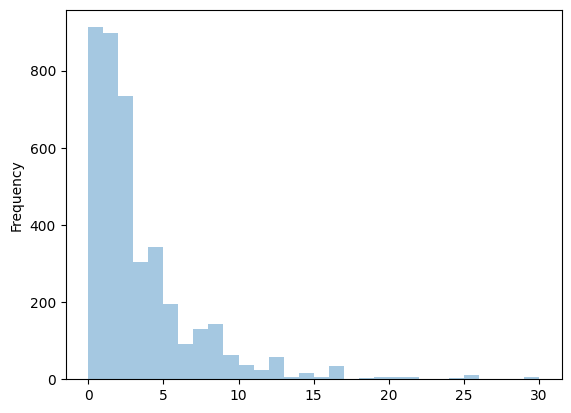

In [669]:
items.UnitPrice.plot.hist(bins=30, alpha=0.4, range=(0, 30))

#### My Explanation
1. The average item-unit price is 6.91.
2. There are 98.75% items that cost less than $25.
3. I select 0~30 as my range since the items over \$16 are very few, and take up a small proportion of the whole population. From this histogram, the most of the items are under \$4 and the number of items becomes fewer as the prices rise.

### <span style="color:magenta"> Q4. [25 points] Order Trends </span>
1. What are the top 10 most ordered items? Describe them. Do you see any trends?  
1. What are the top 5 invoices that generated the most revenue? (Revenue is calculated by "marking up" the unit price by 25%.) 
1. Do the top 5 invoices contain any of the top 10 most ordered items?

_Hint: When calculating the revenue we suggest adding a new column on the dataframe._

#### 4.1

In [670]:
items['StockCodeSC'] = "SC" + items['StockCode']
items

,StockCode,Description,UnitPrice,StockCodeSC
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,SC85123A
1,71053,WHITE METAL LANTERN,3.39,SC71053
2,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,SC84406B
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,SC84029G
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,SC84029E
...,...,...,...,...
4065,85179a,GREEN BITTY LIGHT CHAIN,2.46,SC85179a
4066,23617,SET 10 CARDS SWIRLY XMAS TREE 17104,2.91,SC23617
4067,90214U,"LETTER ""U"" BLING KEY RING",0.29,SC90214U
4068,47591b,SCOTTIES CHILDRENS APRON,4.13,SC47591b


In [671]:
top10_item = purchases.groupby(['StockCodeSC']).Quantity.sum().\
    sort_values(ascending=False).head(10)
top10_item

StockCodeSC
SC23843     80995
SC23166     78033
SC22197     56921
SC84077     55047
SC85099B    48478
SC85123A    41408
SC21212     36419
SC84879     36301
SC23084     30754
SC22492     26633
Name: Quantity, dtype: int64

In [672]:
# items[items['StockCodeSC'].
#     isin(top10_item.reset_index()['StockCodeSC'])].Description
top10_item_des = pd.DataFrame(top10_item).merge(items, on='StockCodeSC', how='left').head(10)
top10_item_des

,StockCodeSC,Quantity,StockCode,Description,UnitPrice
0,SC23843,80995,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08
1,SC23166,78033,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04
2,SC22197,56921,22197,SMALL POPCORN HOLDER,0.72
3,SC84077,55047,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,0.29
4,SC85099B,48478,85099B,JUMBO BAG RED RETROSPOT,1.65
5,SC85123A,41408,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
6,SC21212,36419,21212,PACK OF 72 RETROSPOT CAKE CASES,0.42
7,SC84879,36301,84879,ASSORTED COLOUR BIRD ORNAMENT,1.69
8,SC23084,30754,23084,RABBIT NIGHT LIGHT,2.08
9,SC22492,26633,22492,MINI PAINT SET VINTAGE,0.65


#### 4.2

In [673]:
purchases_items = purchases.\
    merge(items, on='StockCodeSC', how='left')
purchases_items

,InvoiceNo,StockCodeSC,Quantity,StockCode,Description,UnitPrice
0,536365,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55
1,536365,SC71053,6,71053,WHITE METAL LANTERN,3.39
2,536365,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75
3,536365,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39
4,536365,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39
...,...,...,...,...,...,...
532616,581587,SC22613,12,22613,PACK OF 20 SPACEBOY NAPKINS,1.66
532617,581587,SC22899,6,22899,CHILDREN'S APRON DOLLY GIRL,2.10
532618,581587,SC23254,4,23254,CHILDRENS CUTLERY DOLLY GIRL,4.15
532619,581587,SC23255,4,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.15


In [674]:
purchases_items['ItemPrice'] = purchases_items.Quantity \
    * purchases_items.UnitPrice
purchases_items['ItemRevenue'] = purchases_items['ItemPrice'] * 1.25
purchases_items.head()

,InvoiceNo,StockCodeSC,Quantity,StockCode,Description,UnitPrice,ItemPrice,ItemRevenue
0,536365,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,15.30,19.125
1,536365,SC71053,6,71053,WHITE METAL LANTERN,3.39,20.34,25.425
2,536365,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,22.00,27.500
3,536365,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,20.34,25.425
4,536365,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,20.34,25.425


In [675]:
top5 = purchases_items.groupby('InvoiceNo').sum('ItemRevenue').reset_index().\
    sort_values(by='ItemRevenue', ascending=False).head(10).\
        loc[:, ['InvoiceNo', 'ItemRevenue']].head(5)
top5

,InvoiceNo,ItemRevenue
5485,547966,712212.5000
22025,581483,210587.0000
2303,541431,96479.5000
9654,556255,37305.0000
9951,556917,34545.9125


#### 4.3

In [676]:
purchases_items[(purchases_items['InvoiceNo'].
    isin(top5['InvoiceNo']))
    & (purchases_items['StockCodeSC'].isin(top10_item_des['StockCodeSC']))] 

,InvoiceNo,StockCodeSC,Quantity,StockCode,Description,UnitPrice,ItemPrice,ItemRevenue
60580,541431,SC23166,74215,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,77183.60,96479.50
224029,556917,SC23166,96,23166,MEDIUM CERAMIC TOP STORAGE JAR,1.04,99.84,124.80
224062,556917,SC23084,240,23084,RABBIT NIGHT LIGHT,2.08,499.20,624.00
224098,556917,SC85099B,100,85099B,JUMBO BAG RED RETROSPOT,1.65,165.00,206.25
224105,556917,SC22492,576,22492,MINI PAINT SET VINTAGE,0.65,374.40,468.00
224116,556917,SC21212,240,21212,PACK OF 72 RETROSPOT CAKE CASES,0.42,100.80,126.00
531140,581483,SC23843,80995,23843,"PAPER CRAFT , LITTLE BIRDIE",2.08,168469.60,210587.00


**My Explanation**
1. The top 10 most ordered items are as follows. Most of them are small an daily-usage things, which may indicated that the cheap and small things are the most.

- PAPER CRAFT, LITTLE BIRDIE
- MEDIUM CERAMIC TOP STORAGE JAR
- SMALL POPCORN HOLDER
- WORLD WAR 2 GLIDERS ASSTD DESIGNS
- JUMBO BAG RED RETROSPOT
- WHITE HANGING HEART T-LIGHT HOLDER
- PACK OF 72 RETROSPOT CAKE CASES
- ASSORTED COLOUR BIRD ORNAMENT
- RABBIT NIGHT LIGHT
- MINI PAINT SET VINTAGE

2. The top 5 invoices are as follows: 
- 547966
- 581483
- 541431
- 556255
- 556917
3. Yes, and they some items contained
- MEDIUM CERAMIC TOP STORAGE JAR
- RABBIT NIGHT LIGHT
- JUMBO BAG RED RETROSPOT
- MINI PAINT SET VINTAGE
- PACK OF 72 RETROSPOT CAKE
- CASES
- PAPER CRAFT, LITTLE BIRDIE

### <span style="color:magenta"> Q5. [30 points] Customer Analysis </span>
1. Classify customers into segments based on the total revenue they have generated for the company.
 * low value: less than \$1750  
 * medium value: between 1750 and 8250 dollars
 * high value: greater than \$8250
1. How many customers are in each segment? 
1. Using the pivot table function, create a table that displays the average order quantity of each stock code for a given segment.
1. Are the items with the highest average order quantity generally the same across segments? Explain your reasoning. 
1. Choose three items and discuss any trends/differences you notice across the three segments.

_Hint: When calculating the segment, we suggest constructing a new dataframe as an intermediary step with the columns: CustomerID, Revenue, Segment._

#### 5.1

In [677]:
sum_table = invoices_customerid.merge(purchases_items, on='InvoiceNo', how='left')
sum_table.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,StockCode,Description,UnitPrice,ItemPrice,ItemRevenue
0,536365,12/1/10 8:26,17850,United Kingdom,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,15.30,19.125
1,536365,12/1/10 8:26,17850,United Kingdom,SC71053,6,71053,WHITE METAL LANTERN,3.39,20.34,25.425
2,536365,12/1/10 8:26,17850,United Kingdom,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,22.00,27.500
3,536365,12/1/10 8:26,17850,United Kingdom,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,20.34,25.425
4,536365,12/1/10 8:26,17850,United Kingdom,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,20.34,25.425


In [678]:
cus_rev = pd.DataFrame\
    (sum_table.groupby('CustomerID').sum('ItemRevenue')['ItemRevenue'])
cus_rev

,ItemRevenue
CustomerID,
12346,96479.5000
12347,6798.0500
12348,2237.7000
12349,2408.7000
12350,510.0500
...,...
18280,317.0750
18281,84.3500
18282,290.4625


In [679]:
cus_rev['segments'] = pd.cut(cus_rev['ItemRevenue'], 
    bins= [-float('inf'), 1750, 8250, float('inf')], 
    right=[False, True, False],
    labels=['low', 'mid', 'high'])
cus_rev.sample(10)

,ItemRevenue,segments
CustomerID,,
15520,610.4250,low
15361,607.0500,low
14204,227.4875,low
16732,758.2875,low
15641,3736.2500,mid
14184,589.5875,low
14836,143.6625,low
15845,4977.5125,mid
12723,930.8625,low


In [680]:
cus_rev.groupby('segments').size()

segments
low     2845
mid     1254
high     240
dtype: int64

#### 5.2

In [681]:
sum_table = sum_table.merge(cus_rev, on='CustomerID', how='left')
sum_table.head()

,InvoiceNo,InvoiceDate,CustomerID,Country,StockCodeSC,Quantity,StockCode,Description,UnitPrice,ItemPrice,ItemRevenue_x,ItemRevenue_y,segments
0,536365,12/1/10 8:26,17850,United Kingdom,SC85123A,6,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2.55,15.30,19.125,6785.5125,mid
1,536365,12/1/10 8:26,17850,United Kingdom,SC71053,6,71053,WHITE METAL LANTERN,3.39,20.34,25.425,6785.5125,mid
2,536365,12/1/10 8:26,17850,United Kingdom,SC84406B,8,84406B,CREAM CUPID HEARTS COAT HANGER,2.75,22.00,27.500,6785.5125,mid
3,536365,12/1/10 8:26,17850,United Kingdom,SC84029G,6,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,3.39,20.34,25.425,6785.5125,mid
4,536365,12/1/10 8:26,17850,United Kingdom,SC84029E,6,84029E,RED WOOLLY HOTTIE WHITE HEART.,3.39,20.34,25.425,6785.5125,mid


In [682]:
sum_pt = sum_table.pivot_table(index='segments', columns='StockCodeSC', \
    values='Quantity', aggfunc='mean')
sum_pt

StockCodeSC,SC10002,SC10080,SC10120,SC10123C,SC10124A,SC10124G,SC10125,SC10133,SC10135,SC11001,...,SC90214V,SC90214W,SC90214Y,SC90214Z,SCBANK CHARGES,SCC2,SCDOT,SCM,SCPADS,SCPOST
segments,,,,,,,,,,,,,,,,,,,,,
low,8.222222,11.000000,4.692308,2.0,3.5,4.5,11.736842,20.518519,12.543478,12.823529,...,12.0,12.0,30.0,12.0,1.0,1.04,NaN,5.489583,1.0,1.975862
mid,9.307692,15.857143,8.928571,1.0,3.0,4.0,10.741935,20.802817,18.159091,13.687500,...,NaN,NaN,NaN,NaN,1.0,1.00,NaN,6.541284,1.0,2.923775
high,30.705882,7.000000,2.333333,NaN,NaN,NaN,47.857143,13.576923,18.129032,39.733333,...,1.0,NaN,1.0,NaN,1.0,1.00,1.0,68.298851,1.0,3.637066


In [683]:
sum_pt_des = sum_table.pivot_table(index='segments', columns='Description', \
    values='Quantity', aggfunc='mean')
sum_pt_des

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,...,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY,check,found,mailout,mailout,wet damaged
segments,,,,,,,,,,,,,,,,,,,,,
low,1.750000,12.500000,5.44000,3.047619,1.750000,1.545455,12.551724,5.445455,2.250000,3.714286,...,13.553191,19.153846,11.290909,2.000000,2.000000,3.333333,1.0,7.604607,7.442105,NaN
mid,3.833333,12.965517,7.21875,3.148148,1.769231,1.750000,13.440000,6.114650,2.015625,2.333333,...,13.653333,15.788991,13.063158,2.166667,2.500000,1.625000,NaN,10.718687,10.058824,NaN
high,8.428571,38.526316,36.08000,9.217391,1.833333,3.285714,36.190476,24.966942,5.581395,7.222222,...,13.551724,30.125000,17.738095,2.000000,7.428571,5.833333,1.0,25.804204,26.738462,12.666667


#### 5.3

In [684]:
print(sum_pt.loc['low'].sort_values(ascending=False).head(5))
print(sum_pt.loc['mid'].sort_values(ascending=False).head(5))
print(sum_pt.loc['high'].sort_values(ascending=False).head(5))

StockCodeSC
SC17096    516.750000
SC84568    452.571429
SC84598    288.000000
SC16045    151.851852
SC16259    122.833333
Name: low, dtype: float64
StockCodeSC
SC18007    710.000000
SC16014    390.636364
SC84568    288.000000
SC84598    288.000000
SC22053    285.857143
Name: mid, dtype: float64
StockCodeSC
SC23843     80995.000000
SC84826      2556.000000
SC47556B     1300.000000
SC23166       912.952381
SC84568       840.000000
Name: high, dtype: float64


In [685]:
print(sum_pt_des.loc['low'].sort_values(ascending=False).head(7))
print(sum_pt_des.loc['mid'].sort_values(ascending=False).head(7))
print(sum_pt_des.loc['high'].sort_values(ascending=False).head(7))

Description
ASSORTED LAQUERED INCENSE HOLDERS    516.750000
GIRLS ALPHABET IRON ON PATCHES       452.571429
BOYS ALPHABET IRON ON PATCHES        288.000000
POPART WOODEN PENCILS ASST           151.851852
PIECE OF CAMO STATIONERY SET         122.833333
ASSORTED INCENSE PACK                120.000000
TEATIME GEL PENS ASST                 90.000000
Name: low, dtype: float64
Description
ESSENTIAL BALM 3.5g TIN IN ENVELOPE    710.000000
SMALL CHINESE STYLE SCISSOR            390.636364
BOYS ALPHABET IRON ON PATCHES          288.000000
GIRLS ALPHABET IRON ON PATCHES         288.000000
EMPIRE DESIGN ROSETTE                  285.857143
RAIN PONCHO                            204.000000
SOMBRERO                               147.320000
Name: mid, dtype: float64
Description
PAPER CRAFT , LITTLE BIRDIE        80995.000000
ASSTD DESIGN 3D PAPER STICKERS      2556.000000
MEDIUM CERAMIC TOP STORAGE JAR       912.952381
GIRLS ALPHABET IRON ON PATCHES       840.000000
PINK/BLUE DISC/MIRROR STRING      

#### 5.4

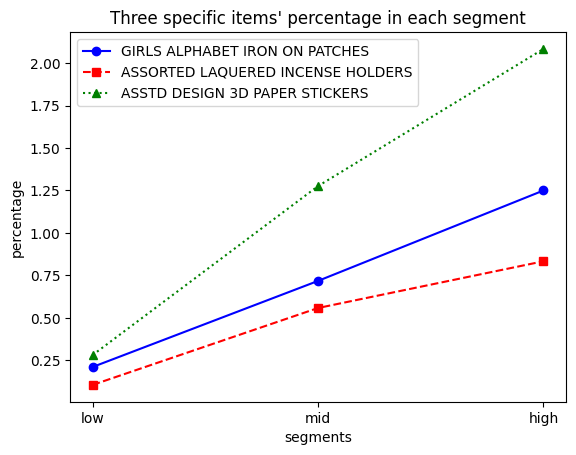

In [686]:
import matplotlib.pyplot as plt

StockCodeSC_l=['SC84568', 'SC17096','SC84826']
seg_list = ['low', 'mid', 'high']
color_l=['b', 'r', 'g']
marker_l=['o', 's', '^']
style_l=['-', '--', ':']
seg_percentage = [0]*3

for StockCodeSC_rank in range(len(StockCodeSC_l)): 
    StockCodeSC_tmp = StockCodeSC_l[StockCodeSC_rank]
    for seg_num in range(len(seg_list)):
        seg_percentage[seg_num]=sum_table\
            [(sum_table.StockCodeSC==StockCodeSC_tmp) & \
                (sum_table.segments==seg_list[seg_num])].\
            CustomerID.nunique()\
            /(sum_table[sum_table.segments==seg_list[seg_num]].CustomerID.\
            nunique())*100
    plt.plot(seg_list, seg_percentage, marker=marker_l[StockCodeSC_rank],\
        linestyle=style_l[StockCodeSC_rank], color=color_l[StockCodeSC_rank], \
        label=sum_table[sum_table.StockCodeSC==StockCodeSC_tmp].\
        Description.unique()[0])
    
plt.xlabel('segments')
plt.ylabel('percentage')

plt.legend()
plt.title('Three specific items\' percentage in each segment')
plt.show()

**My Explanation**
1. There are 2,845 in 'low value', 1,254 in 'medium value' and 240 in 'high value'.
2. The pivot table is created in the code.
3. No, from the result of top 7 items of each segments, it seems that some items of each segment are the same, lik 'girls alphabet iron on patches', others are different.
4. I choose thre specific items and analyze their percentage in each segement group. All the three items' percentage grow when the segment turns from 'low' to 'high'.

# Please submit your completed notebook in .IPYNB and .HTML formats via Canvas